In [1]:
import json
import os

import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import scipy.stats as stats
import seaborn as sns

In [2]:
# File list
dir_list = []
for dir in os.listdir('./DevGPT'):
    if 'snapshot' in dir:
        dir_list.append(f'./DevGPT/{dir}')

print(dir_list)


['./DevGPT/snapshot_20230727', './DevGPT/snapshot_20230803', './DevGPT/snapshot_20230810', './DevGPT/snapshot_20230817', './DevGPT/snapshot_20230824', './DevGPT/snapshot_20230831', './DevGPT/snapshot_20230907', './DevGPT/snapshot_20230914', './DevGPT/snapshot_20231012']


#### Loading Json File by Path

In [3]:
def load_json(file_path):
    json_file_path = file_path

    with open(json_file_path, 'r') as file:
        # Load JSON data into a Python object
        return json.load(file)

def execute_in_all(filelist, func):
    result_list = []
    for folder in filelist:
        for filename in os.listdir(folder):
            if filename.endswith('.json'):
                file_path = os.path.join(folder, filename)
                data = load_json(file_path)
                result_list += func(data)
    return result_list
        

### RQ1. What is the distribution of different issues that developer present to ChatGPT on link shared to github?

#### Method 1: Visualization of Different type of Github Links

In [4]:
type_list = []

def count_type(data):
    type_list = []
    for source in data['Sources']:
        create_time = 'CreatedAt' if 'CreatedAt' in source else 'AuthorAt'
        type_list.append((source['Type'], source[create_time]))
    return type_list

type_list += execute_in_all(filelist=dir_list, func=count_type)

In [5]:
# Gather the # of each type
type_dict = {}
for type in type_list:
    if type[0] not in type_dict:
        type_dict[type[0]] = [1]
    else:
        type_dict[type[0]][0] += 1

print(type_dict)

time_dict = {}
for type in type_list:
    time = type[1][:7]
    if time not in time_dict:
        time_dict[time] = {}
    if type[0] not in time_dict[time]:
        time_dict[time][type[0]] = 1
    else:
        time_dict[time][type[0]] += 1

print(time_dict)

{'hacker news': [1633], 'pull request': [1693], 'issue': [3081], 'discussion': [398], 'commit': [3245], 'code file': [8664]}
{'2023-07': {'hacker news': 443, 'pull request': 684, 'issue': 828, 'discussion': 100, 'commit': 1411, 'code file': 2572}, '2023-06': {'hacker news': 675, 'pull request': 546, 'issue': 949, 'discussion': 156, 'commit': 144, 'code file': 928}, '2023-05': {'hacker news': 180, 'pull request': 126, 'issue': 254, 'discussion': 52, 'commit': 26, 'code file': 12}, '2023-04': {'pull request': 19, 'issue': 54}, '2022-12': {'pull request': 9, 'issue': 9}, '2023-03': {'issue': 70}, '2017-12': {'issue': 9}, '2016-06': {'issue': 9}, '2022-09': {'issue': 9, 'pull request': 2}, '2022-11': {'issue': 23}, '2022-08': {'issue': 22}, '2021-10': {'issue': 18}, '2022-02': {'issue': 10}, '2022-01': {'issue': 18, 'discussion': 1}, '2021-09': {'issue': 18}, '2023-02': {'issue': 9, 'pull request': 8, 'discussion': 3}, '2020-11': {'issue': 10}, '2021-01': {'issue': 10}, '2021-05': {'issue'

In [6]:
type_df = pd.DataFrame.from_dict(type_dict)
time_df = pd.DataFrame.from_dict(time_dict)

In [7]:
time = time_df.sort_index(axis=1)
print(time)

row_sum = time.iloc[5].sum()
print(row_sum)

              2013-06  2016-06  2016-12  2017-12  2019-12  2020-10  2020-11  \
hacker news       NaN      NaN      NaN      NaN      NaN      NaN      NaN   
pull request      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
issue             6.0      9.0      4.0      9.0      7.0      2.0     10.0   
discussion        NaN      NaN      NaN      NaN      NaN      NaN      NaN   
commit            NaN      NaN      NaN      NaN      NaN      NaN      NaN   
code file         NaN      NaN      NaN      NaN      NaN      NaN      NaN   

              2020-12  2021-01  2021-05  ...  2023-01  2023-02  2023-03  \
hacker news       NaN      NaN      NaN  ...      NaN      NaN      NaN   
pull request      NaN      NaN      NaN  ...      NaN      8.0      NaN   
issue             NaN     10.0     15.0  ...      6.0      9.0     70.0   
discussion        9.0      NaN      NaN  ...      NaN      3.0      NaN   
commit            NaN      NaN      NaN  ...      NaN      NaN      NaN

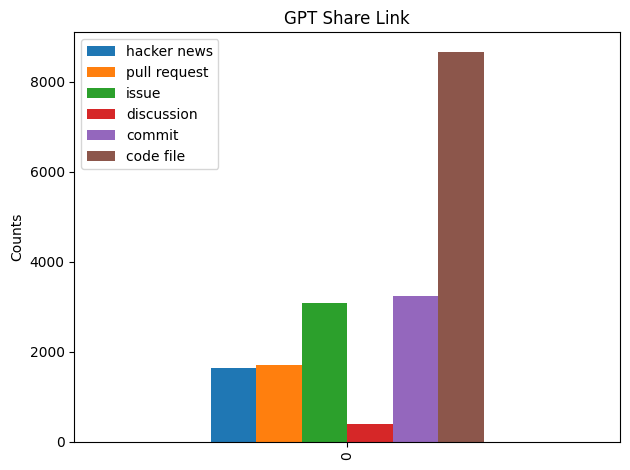

In [8]:
type_df.plot(kind='bar', legend=True)
plt.ylabel('Counts')
plt.title('GPT Share Link')
plt.tight_layout()
plt.show()

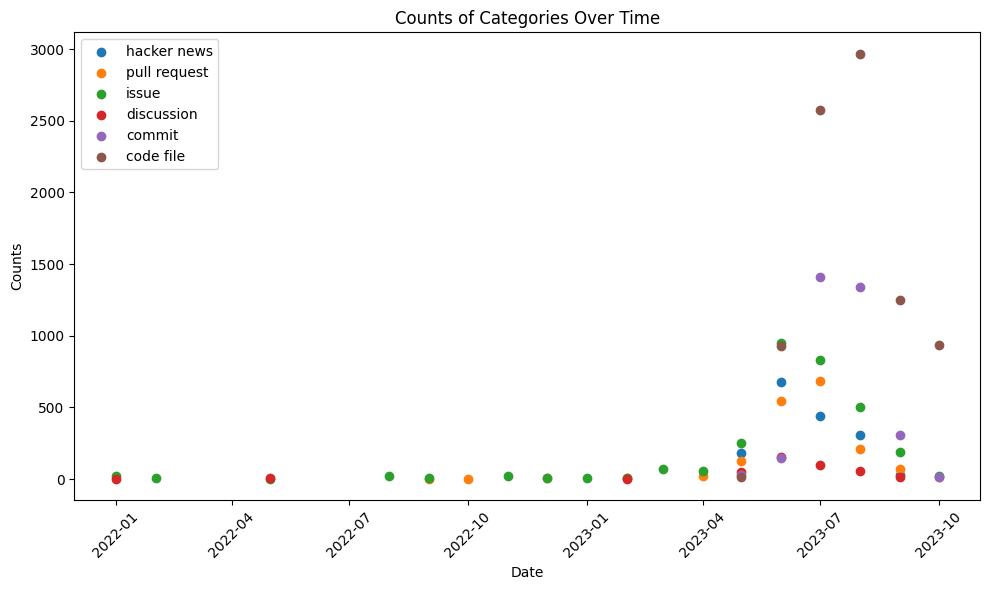

In [9]:
df = time_df

df.columns = pd.to_datetime(df.columns)

df = df.sort_index(axis=1)
df = df.loc[:, df.columns.year >= 2022]

# Plot scatter plot
fig, ax = plt.subplots(figsize=(10, 6))
for category in df.index:
    ax.scatter(df.columns, df.loc[category], label=category)

# Add legend and labels
ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('Counts')
ax.set_title('Counts of Categories Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
# Find data from 2022 Jan
def find_2022(data):
    data_list = []
    for source in data['Sources']:
        create_time = 'CreatedAt' if 'CreatedAt' in source else 'AuthorAt'
        if source[create_time][:7] == '2022-01':
            data_list.append(source)
    return data_list

share_2022 = execute_in_all(filelist=dir_list, func=find_2022)

In [11]:
import pprint
# Prints the nicely formatted dictionary
pprint.pprint(share_2022[0])
# Sets 'pretty_dict_str' to the formatted string value
pretty_dict_str = pprint.pformat(share_2022[0])

{'Author': 'ivansglazunov',
 'Body': 'https://github.com/deep-foundation/deeplinks/issues/40\r\n'
         '\r\n'
         '- RouterHandlers for difference protocols as webrtc for example.\r\n'
         '- Extend minilinks stream protocol for stream against many ml '
         'clients with something as AncientSouls bundles '
         'https://github.com/AncientSouls/Cursor/blob/master/src/tests/bundle.ts.',
 'ChatgptSharing': [{'Conversations': [{'Answer': 'To complete the task '
                                                  '"Minilinks stream sync '
                                                  'against clients #41" as a '
                                                  'pull request on the GitHub '
                                                  'repository '
                                                  'deep-foundation/deeplinks, '
                                                  'the following questions '
                                                  'should b

##### Conclusion 1
The user often respond to old post with ChatGPT links, this result in the inaccuracy of data.
To Do: Use data of the ChatGPT link to estimatetime.

In [12]:
type_list = []

def count_type(data):
    type_list = []
    for source in data['Sources']:
        for share in source['ChatgptSharing']:
            if 'DateOfConversation' in share:
                type_list.append((source['Type'], share['DateOfConversation']))
    return type_list

type_list += execute_in_all(filelist=dir_list, func=count_type)

In [13]:
time_dict = {}
for type in type_list:
    try:
        date = pd.to_datetime(type[1], format="%B %d, %Y")
        time = date.strftime("%B %Y")
        if time not in time_dict:
            time_dict[time] = {}
        if type[0] not in time_dict[time]:
            time_dict[time][type[0]] = 1
        else:
            time_dict[time][type[0]] += 1
    except:
        continue

print(time_dict)

{'July 2023': {'hacker news': 627, 'pull request': 785, 'issue': 945, 'discussion': 147, 'commit': 1382, 'code file': 3882}, 'June 2023': {'hacker news': 783, 'pull request': 628, 'issue': 999, 'discussion': 144, 'commit': 143, 'code file': 3312}, 'May 2023': {'hacker news': 189, 'pull request': 36, 'issue': 244, 'discussion': 18, 'commit': 26, 'code file': 500}, 'August 2023': {'pull request': 240, 'issue': 721, 'commit': 1331, 'code file': 2146, 'hacker news': 705, 'discussion': 63}, 'September 2023': {'pull request': 83, 'issue': 295, 'discussion': 25, 'commit': 304, 'code file': 771, 'hacker news': 42}, 'October 2023': {'commit': 15, 'pull request': 19, 'code file': 129, 'issue': 36}}


In [14]:
time_df = pd.DataFrame.from_dict(time_dict)

C:\Users\chenz\AppData\Local\Temp\ipykernel_5916\2513036327.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.columns = pd.to_datetime(df.columns)


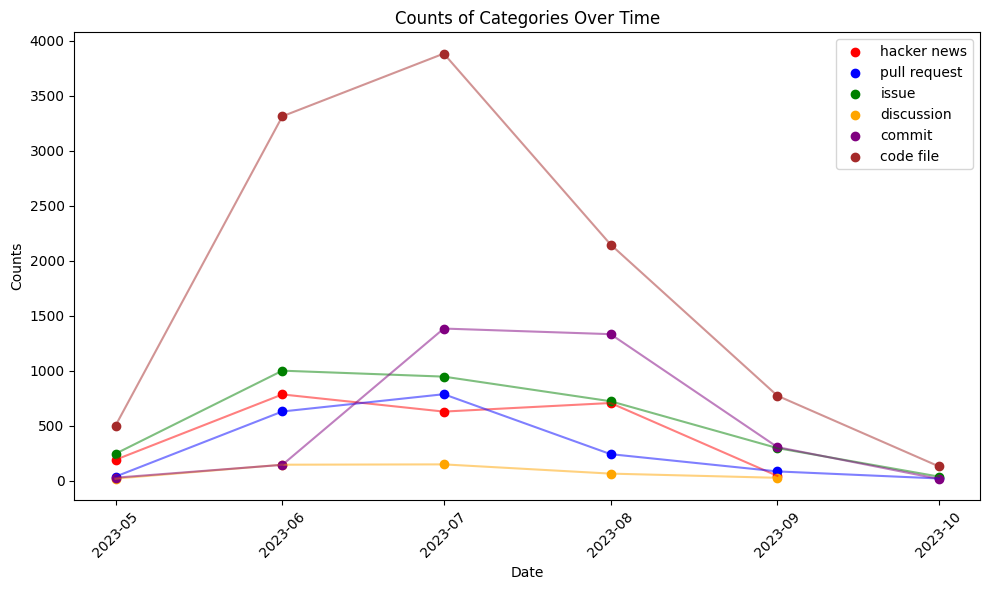

In [15]:
df = time_df

df.columns = pd.to_datetime(df.columns)

df = df.sort_index(axis=1)
# df = df.loc[:, df.columns.year >= 2022]

category_colors = {
    'hacker news': 'red',
    'pull request': 'blue',
    'issue': 'green',
    'discussion': 'orange',
    'commit': 'purple',
    'code file': 'brown'
}

# Plot scatter plot
fig, ax = plt.subplots(figsize=(10, 6))
for category in df.index:
    color = category_colors.get(category, 'black')  # Default to black if color not defined
    ax.scatter(df.columns, df.loc[category], label=category, color=color)

    # Add lines connecting points
    ax.plot(df.columns, df.loc[category], linestyle='-', alpha=0.5, color=color)

# Add legend and labels
ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('Counts')
ax.set_title('Counts of Categories Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Conclusion 2
There is a significant amout of increase in june and july for chatgpt usage. However, the reduce after august might be affected by the fact that more data are collected during augest.
Observation from the chart:
 - People are more instereted in disscussion and solving issues using ChatGpt in May and June.
 - There is a significant amount increase in pr involve ChatGPT link in July and August. (might suggest users are using chatgpt for coding or code reviewing).
    - Suggesting higher confident in ChatGPT's ability in terms of coding. 
 - There are high amount of usage in code file. This cover many different areas, e.g. ChatGPT related toolkits and demos, code initiated with chatgpt, ChatGPT assisted documentation, etc.
    - This means the code file does not directly related to coding questions since majroity of it is documentation related.
 - There is little disscussion, this might because people dont tend to use github disscussion.
    - In contrary the high amount in issue, showing ChatGPT is implemented for work related scenarios very quickly.
 - ChatGPT usage in PR might suggest different reason, e.g. coding style, request update, etc. Can be consider similar to issue.

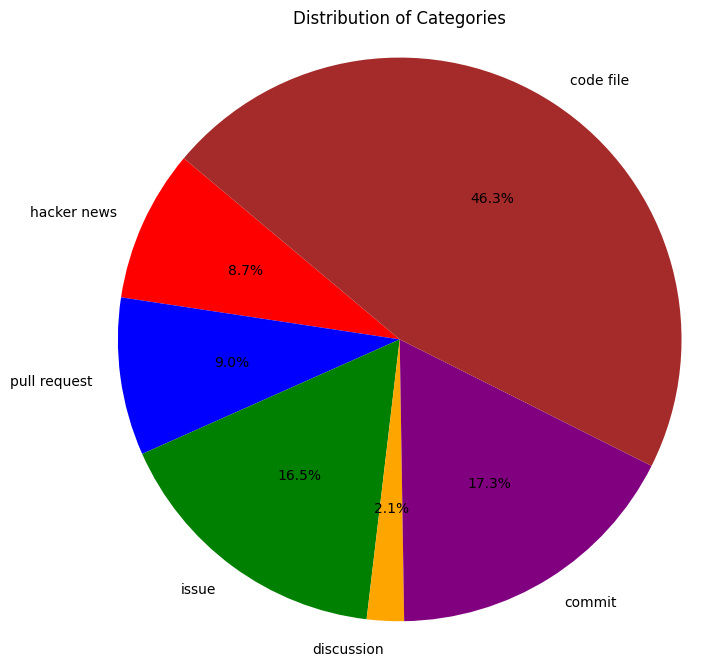

In [16]:
# Get counts for each category for the latest date
category_counts = type_df.loc[0]

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, colors=[category_colors.get(cat, 'black') for cat in category_counts.index], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Categories')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

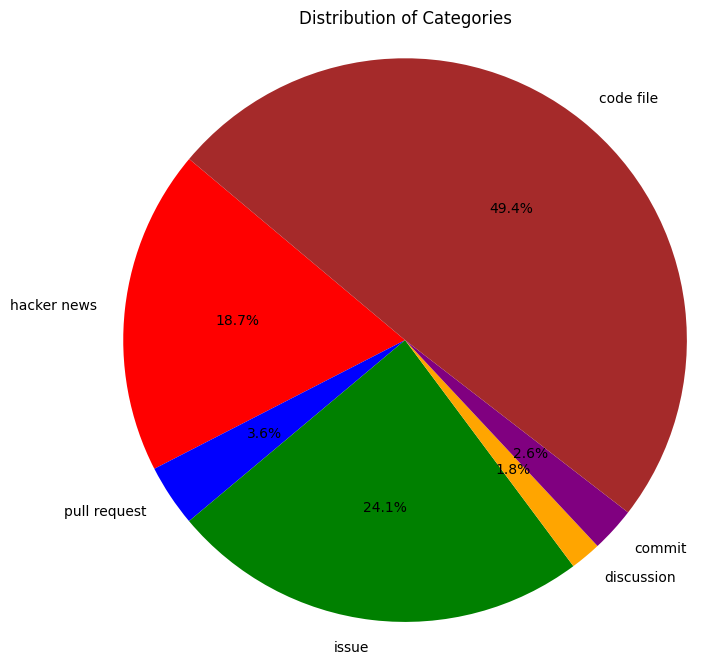

In [17]:
# Get counts for each category for the latest date
new_df = pd.DataFrame.transpose(df)
category_counts = new_df.loc['2023-05-01']

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, colors=[category_colors.get(cat, 'black') for cat in category_counts.index], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Categories')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

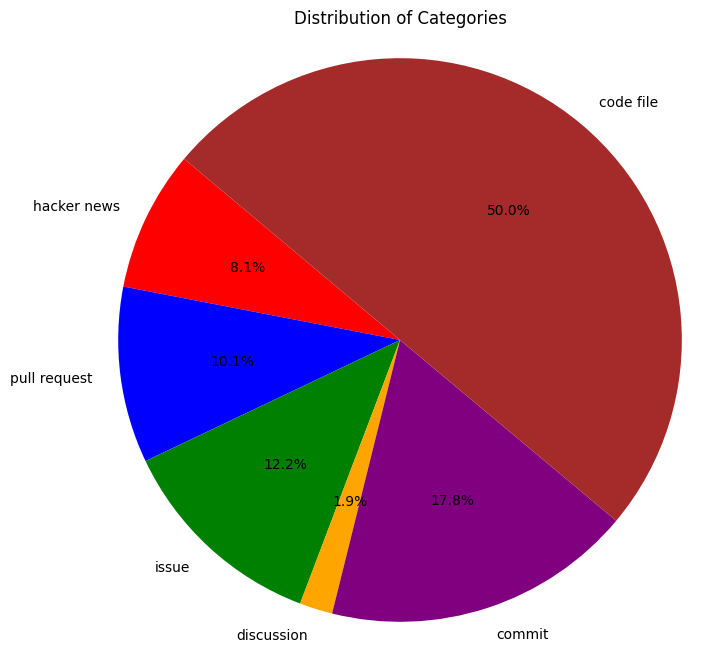

In [18]:
# Get counts for each category for the latest date
new_df = pd.DataFrame.transpose(df)
category_counts = new_df.loc['2023-07-01']

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, colors=[category_colors.get(cat, 'black') for cat in category_counts.index], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Categories')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

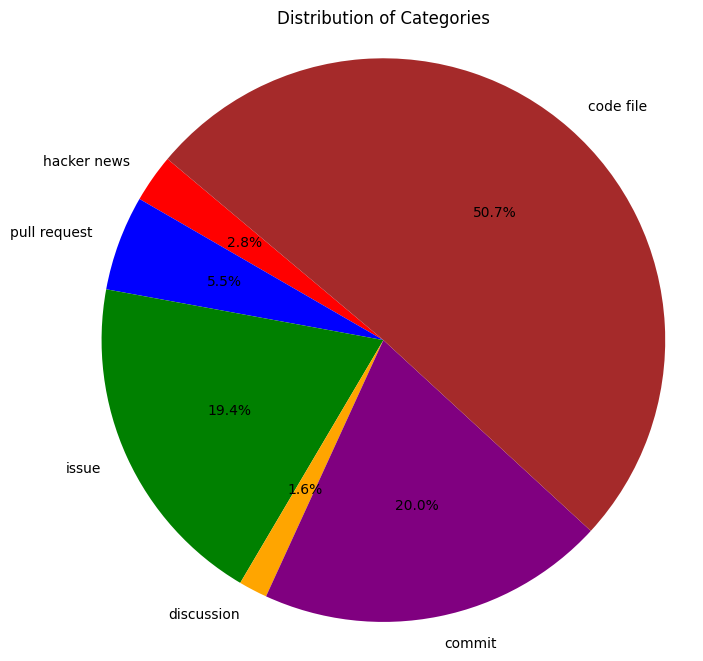

In [19]:
# Get counts for each category for the latest date
new_df = pd.DataFrame.transpose(df)
category_counts = new_df.loc['2023-09-01']

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, colors=[category_colors.get(cat, 'black') for cat in category_counts.index], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Categories')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

##### Conclusion 3
Observation from pie chart:
 - In May most ChatGPT usage are disscusion related.
 - In July there is significant increase in ChatGPT usage in directly coding related topics.
 - In September, the direct usage in pr reduced but increase in commit.
     - This might suggest ChatGPT usage become less welcomed in code base with multiple maintainers.
     - Whereas for smaller independent projects general coding, ChatGPT is considered as sufficient tool.

In [20]:
correlation_matrix = new_df.corr()
print(correlation_matrix)

              hacker news  pull request     issue  discussion    commit  \
hacker news      1.000000      0.747430  0.930321    0.811272  0.498915   
pull request     0.747430      1.000000  0.919579    0.987615  0.531165   
issue            0.930321      0.919579  1.000000    0.960335  0.597491   
discussion       0.811272      0.987615  0.960335    1.000000  0.376165   
commit           0.498915      0.531165  0.597491    0.376165  1.000000   
code file        0.849889      0.976970  0.976730    0.980760  0.634843   

              code file  
hacker news    0.849889  
pull request   0.976970  
issue          0.976730  
discussion     0.980760  
commit         0.634843  
code file      1.000000  


#### Conclusion 4
Base on correlation analysis:
 - hacker news: strong correlation with issues, disscussion. Consider they are all disscusion related.
 - code file: strong correlation to everything but commit. Referencing the nature of code file can be very diverse.
 - commit: low correlation with other categories. The usage of ChatGPT in commit often suggest direct practice of using ChatGPT for coding (referencing ChatGPT link in code).
    - The low correlation with other types in comparison, might suggest most other type of usage of ChatGPT is disscussion related.
    - The change in amount/percentage of commit might shows developer's overall confident level on using ChatGPT for coding assist.

## RQ3 Temporal Change in ChatGPT Interest

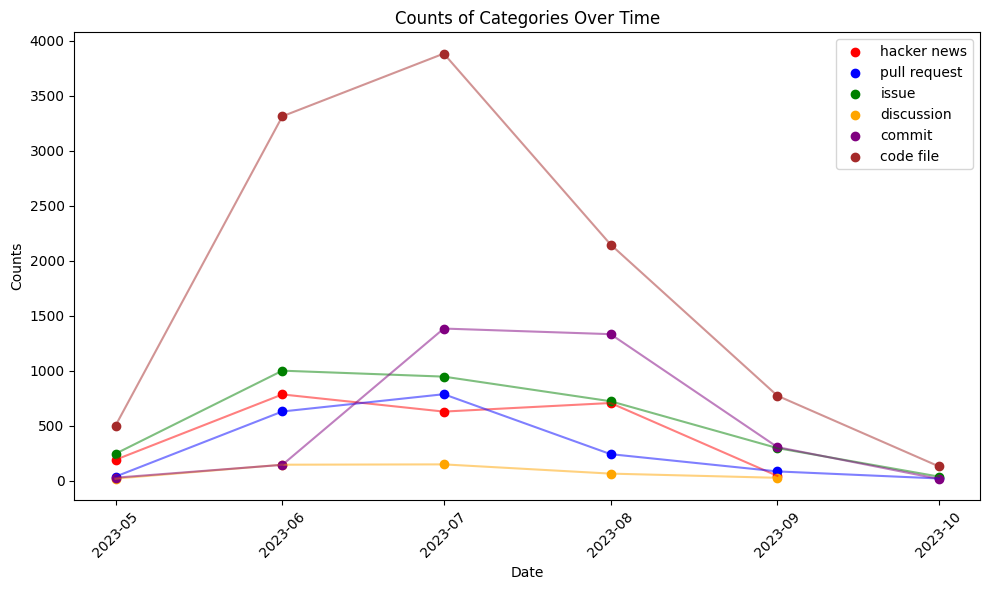

In [21]:
df = time_df

df.columns = pd.to_datetime(df.columns)

df = df.sort_index(axis=1)
# df = df.loc[:, df.columns.year >= 2022]

category_colors = {
    'hacker news': 'red',
    'pull request': 'blue',
    'issue': 'green',
    'discussion': 'orange',
    'commit': 'purple',
    'code file': 'brown'
}

# Plot scatter plot
fig, ax = plt.subplots(figsize=(10, 6))
for category in df.index:
    color = category_colors.get(category, 'black')  # Default to black if color not defined
    ax.scatter(df.columns, df.loc[category], label=category, color=color)

    # Add lines connecting points
    ax.plot(df.columns, df.loc[category], linestyle='-', alpha=0.5, color=color)

# Add legend and labels
ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('Counts')
ax.set_title('Counts of Categories Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Temporal Analysis

From conclusion 1 of RQ1, we observed that there exist changes of interest in different categories on ChatGPT. In this section, we will try to test the statisical significants of this changes.
For this section we compute the rate of change overtime to determine the statistical significance.

In [24]:
# Convert to DataFrame
roc_df = df

# Transpose the DataFrame
roc_df = roc_df.transpose()

# Fill NaN values with 0
roc_df = roc_df.fillna(0)

# Transpose again to compute rate of change in rows
roc_df = roc_df.transpose()

# Compute the rate of change between each month for each category
rate_of_change = roc_df.pct_change(axis=1) * 100  # Multiply by 100 to convert to percentage change

print(df)
print("\nRate of Change:")
print(rate_of_change)

              2023-05-01  2023-06-01  2023-07-01  2023-08-01  2023-09-01  \
hacker news          189         783         627         705          42   
pull request          36         628         785         240          83   
issue                244         999         945         721         295   
discussion            18         144         147          63          25   
commit                26         143        1382        1331         304   
code file            500        3312        3882        2146         771   

              2023-10-01  
hacker news          NaN  
pull request        19.0  
issue               36.0  
discussion           NaN  
commit              15.0  
code file          129.0  

Rate of Change:
              2023-05-01   2023-06-01  2023-07-01  2023-08-01  2023-09-01  \
hacker news          NaN   314.285714  -19.923372   12.440191  -94.042553   
pull request         NaN  1644.444444   25.000000  -69.426752  -65.416667   
issue                NaN   309

### Conclusion 1

The rate of change in the discussion towards chatGPT shows that there is a massive jump in interests after the release of chatGPT. However, there also exists a sharp decrease right afterward. Though from the table we can observe that the initial increase in interest manifest overtime. The interest in discussion (hacker news, discussion, etc) is very high in the first two month, and reduced very fast after the initial hype. Where there are more pr and issue created using ChatGPT showing that although the interest in general community has decrease, many developer does attempt to implement chatGPT as part of their programmign tool kit or for problem solving. However, the commit is heavily reduced, this might suggest that user are less confident using ChatGPT to write code, or it also might because developer have using the code from chatGPT very causally without referencing the ChatGPT conversation in the commit. Therefore, the commit stats is a lot less valuable.